In [ ]:
# 데이터 불러오기
# Load data
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"jongban2","key":"51ce207a7c8e1e9a4e4f17277436e5ef"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 124MB/s]


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
# 자료구조 확인결과 train데이터와 test데이터가 이미 나뉘어저있음
# The dataset is already split into training and test sets

In [ ]:
import pandas as pd
testdf = pd.read_csv("test.csv")

In [ ]:
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# 각 데이터 확인결과 test_csv는 훈련, 검증 불가한 특성들만 있는데이터, 따라서 train.csv만 활용
# Use only train.csv since test.csv has no target labels

In [ ]:
# 데이터 타입 확인
# Check data types
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
df['Cabin'].value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [ ]:
df['Ticket'].value_counts()

,count
Ticket,
347082,7
1601,7
CA. 2343,7
3101295,6
CA 2144,6
...,...
PC 17590,1
17463,1
330877,1


In [ ]:
# 의미없는 컬럼 제거
# Remove irrelevant columns
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df = df.drop(columns=drop_cols)

In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
df['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [ ]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [ ]:
df['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [ ]:
df['Fare'].value_counts()

,count
Fare,
8.0500,43
13.0000,42
7.8958,38
7.7500,34
26.0000,31
...,...
13.8583,1
50.4958,1
5.0000,1


In [ ]:
# 결측치 처리
# Handle missing values
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
# 극소수이기 때문에 제거
# Drop rows with missing values since they are very few
df = df.dropna(subset=["Embarked"])

In [ ]:
# 평균값으로 채우기
# Fill with the mean value
age_mean = df['Age'].mean()
df['Age'].fillna(age_mean, inplace=True)

/tmp/ipython-input-1360418662.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(age_mean, inplace=True)
/tmp/ipython-input-1360418662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(age_mean, inplace=True)


In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
# 데이터 분리
# Split data
from sklearn.model_selection import train_test_split
X = df.drop("Survived", axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# 피처 전처리 (해당단계에서 이상치에민감하고 스케일링을 요하는 거리기반 알고리즘 or 트리기반 알고리즘 결정)
# 트리기반으로 결정

# Feature preprocessing:
# Select model type (distance-based vs. tree-based)
# Chosen: tree-based algorithm

In [ ]:
X_train['Sex'] = X_train['Sex'].map({'male': 0, 'female': 1})
X_test['Sex'] = X_test['Sex'].map({'male': 0, 'female': 1})

# Embarked : One-hot encoding (끝에 train 기준 컬럼 맞춤)
# One-hot encode Embarked and align with train columns
X_train = pd.get_dummies(X_train, columns=['Embarked'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Embarked'], drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
708,1,1,22.000000,0,0,151.5500,False,True
240,3,1,29.642093,1,0,14.4542,False,False
382,3,0,32.000000,0,0,7.9250,False,True
792,3,1,29.642093,8,2,69.5500,False,True
683,3,0,14.000000,5,2,46.9000,False,True
...,...,...,...,...,...,...,...,...
107,3,0,29.642093,0,0,7.7750,False,True
271,3,0,25.000000,0,0,0.0000,False,True
862,1,1,48.000000,0,0,25.9292,False,True
436,3,1,21.000000,2,2,34.3750,False,True


In [ ]:
# train데이터 클래스불균형 확인
# Check class imbalance in the training data
y_train.value_counts()

,count
Survived,
0,440
1,271


In [ ]:
# cross_validation으로 최적의 알고리즘 선택
# Select the optimal algorithm using cross-validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

models = [
    ('DecisionTree', DecisionTreeClassifier(random_state=42)),
    ('ExtraTree', ExtraTreeClassifier(random_state=42)),
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='f1')
    print(f"{name}: F1 평균={scores.mean():.4f}, F1 표준편차={scores.std():.4f}")

DecisionTree: F1 평균=0.7072, F1 표준편차=0.0265
ExtraTree: F1 평균=0.7010, F1 표준편차=0.0321
RandomForest: F1 평균=0.7709, F1 표준편차=0.0125
GradientBoosting: F1 평균=0.7653, F1 표준편차=0.0299


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:27:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:27:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:27:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:27:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: F1 평균=0.7403, F1 표준편차=0.0174


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:27:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# 결과로 평균스코어가 가장높은 RandomForest결정
# Select RandomForest as it achieves the highest average score

In [ ]:
# 그리드서치로 최적의 하이퍼파라미터 튜닝
# Tune hyperparameters using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',
    cv=skf,
    n_jobs=-1,
    verbose=1
)

# 학습
# Train
grid_search.fit(X_train, y_train)

# 결과확인
# Check results
print("최적 파라미터:", grid_search.best_params_)
print("최고 F1 점수:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
최적 파라미터: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
최고 F1 점수: 0.7934647709150389


In [ ]:
# 최적의 모델 생성
# Build the optimal model
model = grid_search.best_estimator_

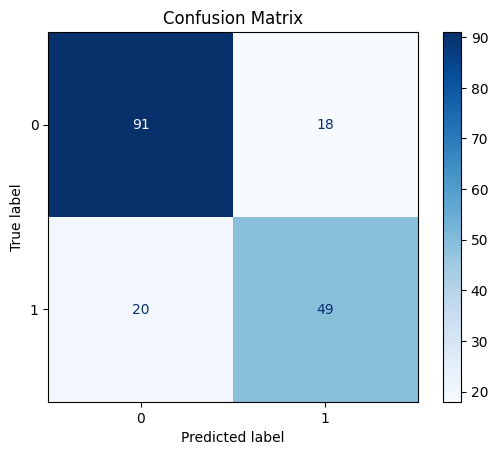

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       109
           1       0.73      0.71      0.72        69

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



In [ ]:
# 최종 성능과 시각화
# Final evaluation and visualization

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 예측
# prediction
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

In [ ]:
# 모델정의 과정에서 class_weight='balanced'를 통해 좀더 f1정확도를 높일수있음
# Using class_weight='balanced' during model definition can improve the F1 score